<h1 style="color:#4d65c6; font-size:280%; text-align:center">House Prices Dataset</h1>

---

# Importing the Dataset and Libraries

In [22]:
#################################
# --- Importing the Libraries ---
#################################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6
plt.style.use('ggplot')

In [2]:
##################################
# --- Loading the training set ---
##################################

data_train = pd.read_csv('train.csv')

In [3]:
# Looking at the columns

print("Columns:-> ", data_train.columns)
print("\nNumber of Columns: ", len(data_train.columns))
print("Number of Rows: ", len(data_train))

Columns:->  Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond',

In [4]:
# Looking at the Categorical variables

data_train.dtypes[data_train.dtypes == 'object'].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
# Looking at the Numerical variables

data_train.dtypes[data_train.dtypes != 'object'].index

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [6]:
# Looking at the first few rows

data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

# Data Exploration

<p style="color:red;">Important variables for analysis (Selected through means of Self Analysis)</p>

<ul style="color:red;">
	<li>OverallQual (Categorical)</li>
	<li>YearBuilt (Categorical)</li>
	<li>TotalBsmtSF (Numerical)</li>
	<li>GrLivArea (Numerical)</li>
</ul>

<h1 style="color:#808080;">1. Analyzing our Dependent Variable "SalePrice"</h1>

In [7]:
#########################################
# --- Descriptive Statistical Summary ---
#########################################

data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<p style="color:red;">
###-> We can see from here that the min value of 'SalePrice' is a positive one, meaning that there are no bad records for 'SalePrice' like negative values
</p>

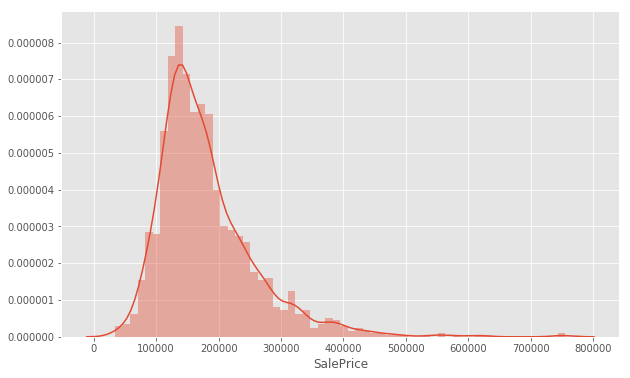

In [8]:
####################################################
# --- Looking at the Distribution of 'SalePrice' ---
####################################################

x = data_train['SalePrice']

sns.distplot(x, bins=60)
plt.show()

<p style="color:red">###-> What we can infer from this plot:-</p>
<ul style="color:red">
	<li>Deviates from Normal Distribution</li>
	<li>Have positive skewness</li>
	<li>Show peakedness</li>
</ul>

In [9]:
# Skewness and Kurtosis

print("Skewness:", data_train['SalePrice'].skew())
print("Kurtosis:", data_train['SalePrice'].kurt())

Skewness: 1.88287575977
Kurtosis: 6.53628186006


<h2 style="color:#934dc6;">(a) Relationship with Numerical Variables</h2>

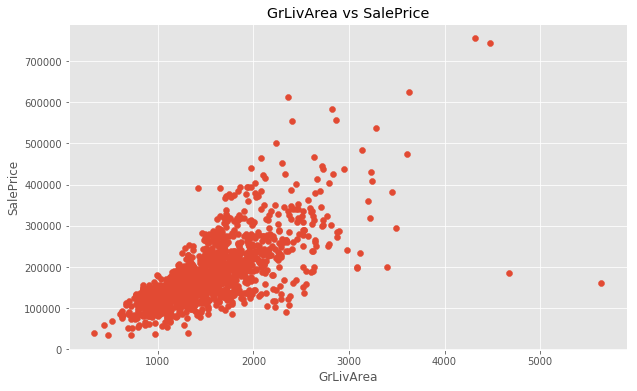

In [10]:
###############################################
# --- Scatter Plot (GrLivArea vs SalePrice) ---
###############################################

x = data_train['GrLivArea']
y = data_train['SalePrice']

plt.scatter(x,y)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title("GrLivArea vs SalePrice")
plt.show()

<p style="color: red">
	###-> It looks like a linear relationship among GrLivArea and SalePrice
</p>

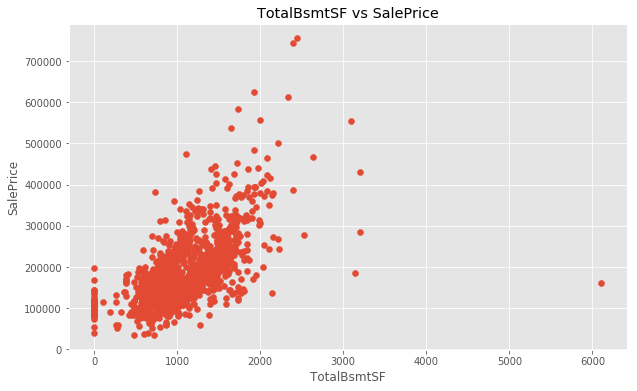

In [11]:
#################################################
# --- Scatter Plot (TotalBsmtSF vs SalePrice) ---
#################################################

x = data_train['TotalBsmtSF']
y = data_train['SalePrice']

plt.scatter(x,y)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title("TotalBsmtSF vs SalePrice")
plt.show()

<p style="color: red">
	###-> It looks like a linear till approx. 3000 sq feet and then closes off.
</p>

<h2 style="color:#934dc6;">(a) Relationship with Categorical Variables</h2>

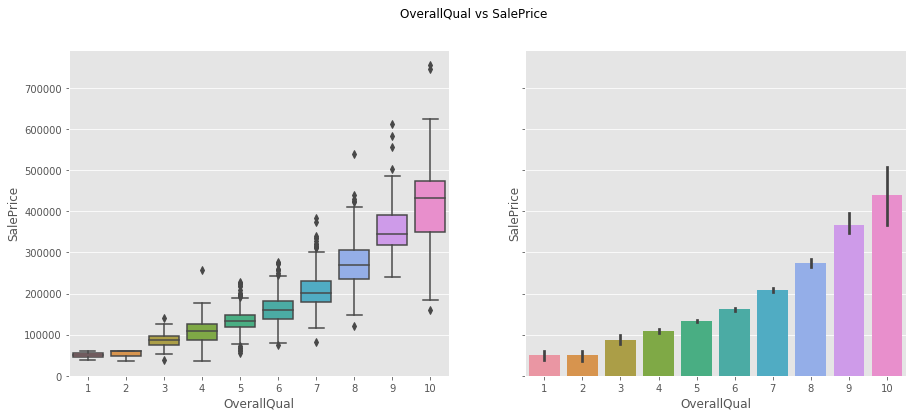

In [12]:
#############################################
# --- Box Plot and Bar Plot (OverallQual vs SalePrice) ---
#############################################

f, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
f.set_figheight(6)
f.set_figwidth(15)

x = data_train['OverallQual']
y = data_train['SalePrice']

sns.boxplot(x,y, ax=ax[0])
sns.barplot(x,y, ax=ax[1])
plt.suptitle("OverallQual vs SalePrice")
plt.show()

<p style="color: red">
	###-> SalePrice increases with Overall Quality
</p>

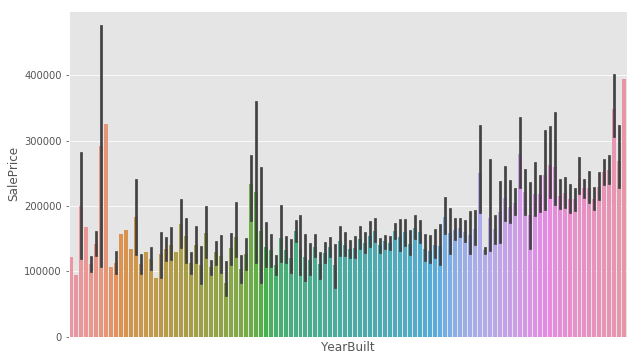

In [13]:
#############################################
# --- Bar Plot (YearBuilt vs SalePrice) ---
#############################################

x = data_train['YearBuilt']
y = data_train['SalePrice']

sns.barplot(x,y)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

plt.show()

<p style="color: red">
	###-> Looks like a trend that SalePrice tend to increase with YearsBuilt (But is not a strong one)
</p>

<p>
	<h3 style="color: red">Summary</h3>
	<ul style="color: red">
		<li>'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. 
        They both have positive relation as the slope is positive 
        </li>
        <li>
			'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'.
		</li>
    </ul>
</p>

---

<h1 style="color:#808080;">2. Analyzing Based on Correlation Matrix</h1>

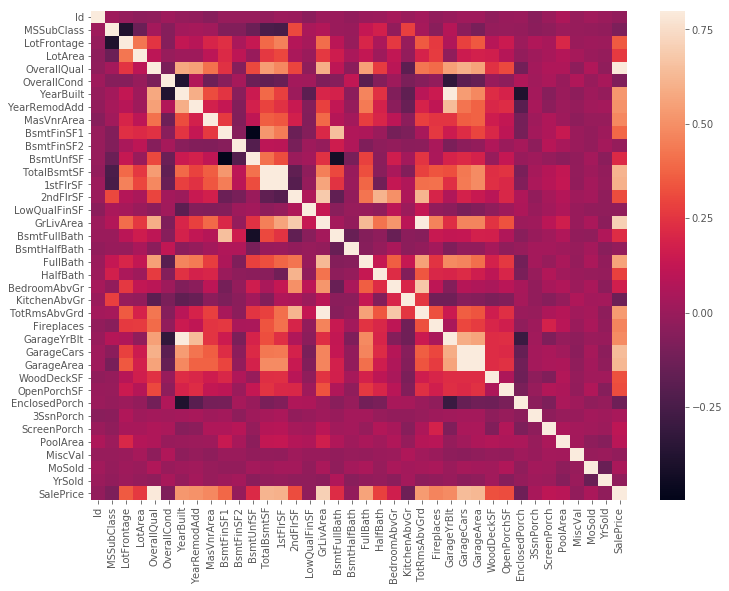

In [14]:
###########################
#--- Correlation Matrix ---
###########################

corr_mat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8)
plt.show()

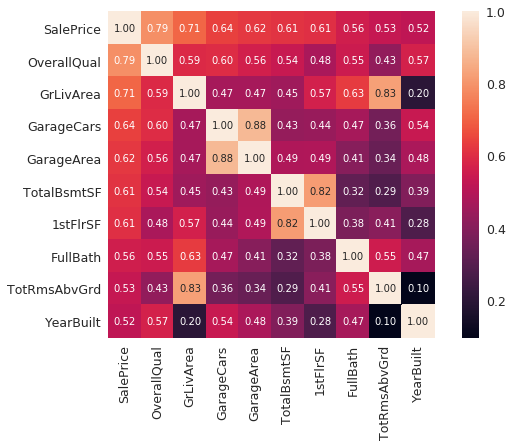

In [15]:
####################################
#--- Correlation Matrix (ZOOMED) ---
####################################

cols = corr_mat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)

sns.set(font_scale=1.25)

sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
           yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<p>
	<h3 style="color: red">Conclusion</h3>
	<ul style="color: red">
		<li>'GrLivArea', 'OverallQual and 'TotalBsmtSF' are strongly related with 'SalePrice'. 
        </li>
        <li>
			'GarageCars' and 'GarageArea' are also related. Out of these we can keep 'GarageCars'.
		</li>
        <li>
			'1stFlrSF' is correlated but is infact the consequence of 'TotalBsmtSF'. So we'll neglect it
		</li>
         <li>
			'YearBuilt' is not strongly correlated but we'll keep it for further analysis
		</li>
    </ul>
</p>

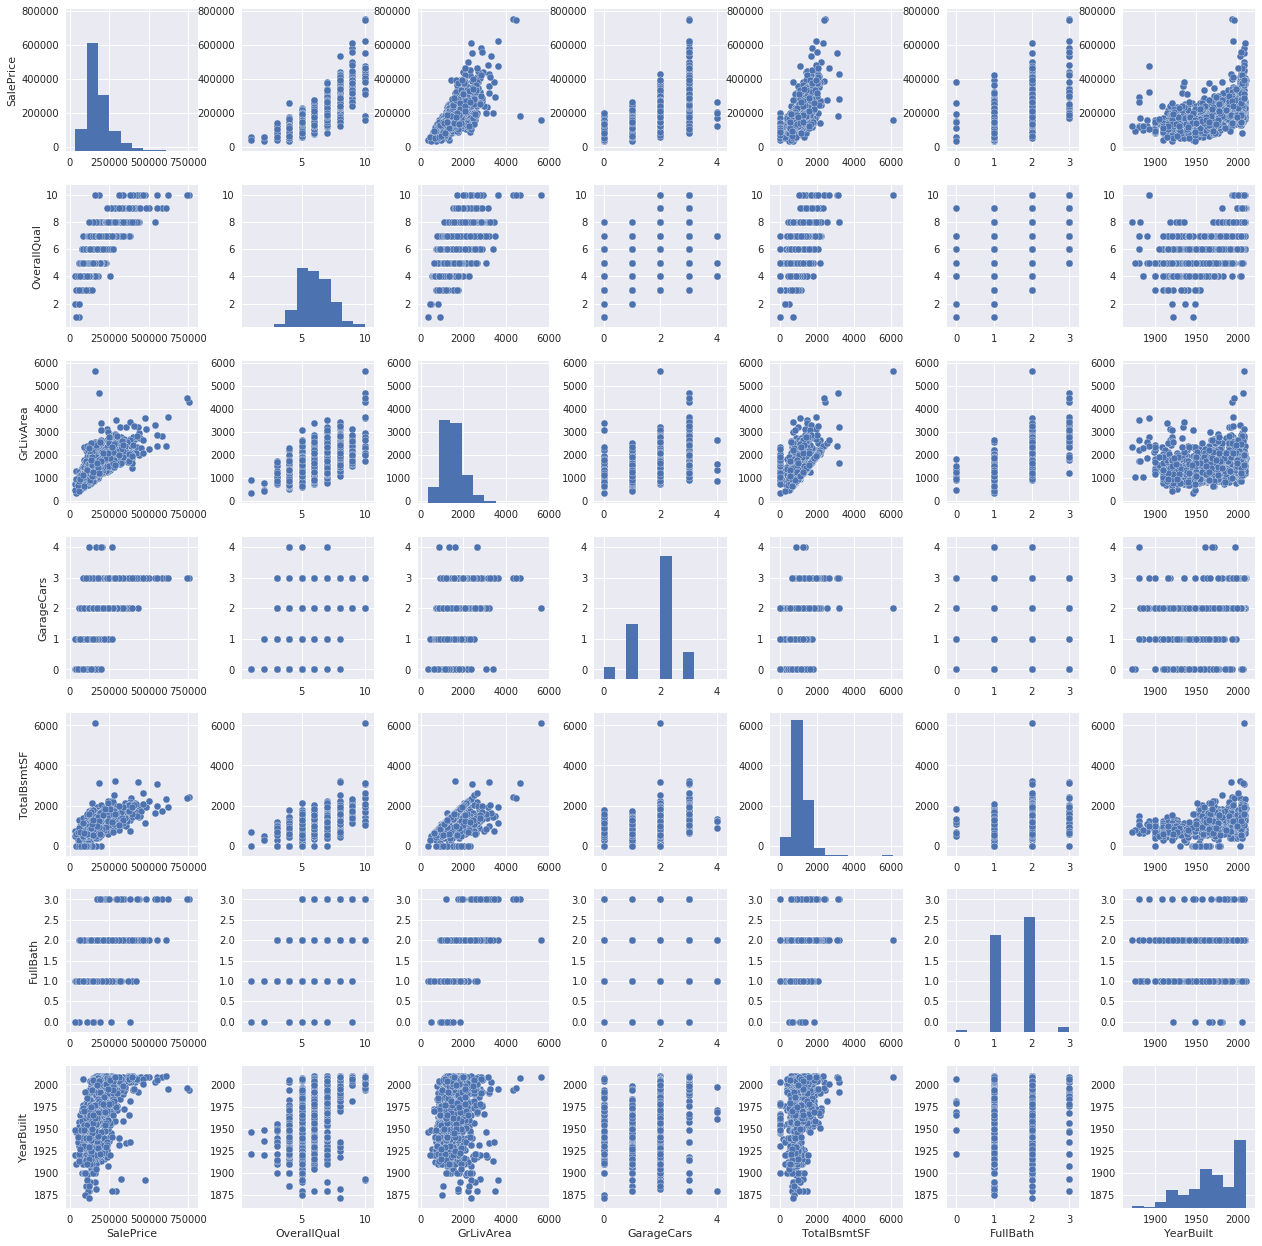

In [16]:
###################################################
# --- Pair Plot between these choosen variables ---
###################################################

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()

<p style="color: red">
	###-> There seems to be a relation between TotalBsmtSF and GrLivArea. In fact a linear relation
</p>

---

# Data Cleaning

In [17]:
#######################################
# --- Missing Data with Percentages ---
#######################################

total = data_train.isnull().sum().sort_values(ascending=False)
percent = round(data_train.isnull().sum()/data_train.isnull().count() * 100, 2).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


<p>
    <h3 style="color: red">Deleting the values</h3>
	<ul style="color: red">
        <li>Deleting the varaibles which have more than 15 percent of missing values.</li>
        <li>Morover these variables with missing values aren't useful either.</li>
        <li>Infact, all the variables starting with Garage, Bsmt, Mas are neither useful as:<br>
            (a) All Garage related info is stored in GrLivArea.<br>
            (b) All Bsmt related info is stored in TotalBsmtSF.<br>
            (c) MasVnrArea and MasVnrType are not useful anyways.</li>
        <li>Electrical column has one missing value, So we can remove that row from our dataset</li>
    </ul>
</p>

In [18]:
###################################
# --- Dealing with Missing Data ---
###################################

labels = missing_data[missing_data.Total > 1].index

data_train = data_train.drop(labels=labels, axis=1)

# Deleting one missing value in 'Electrical'
missing_value = data_train[data_train['Electrical'].isnull()].index
data_train = data_train.drop(labels=missing_value, axis=0)

---

# Searching for Outliers

<h3 style="color:#934dc6;">Univariate Analysis</h3>

In [19]:
############################
# --- Standardizing Data ---
############################
# i.e converting data values to have a mean of 0 and standard deviation of 1

SalePrice_Scaled = StandardScaler().fit_transform(data_train['SalePrice'][:, np.newaxis])

low_range = SalePrice_Scaled[SalePrice_Scaled[:,0].argsort()[:10]]
high_range = SalePrice_Scaled[SalePrice_Scaled[:,0].argsort()[-10:]]

print('Outer Range (low) of the distribution:')
print(low_range)
print('\nOuter Range (high) of the distribution:')
print(high_range)

Outer Range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Outer Range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


<p style="color: red">
	###-> The values 7.10 and 7.22 may be an outlier
</p>

<h3 style="color:#934dc6;">Bivariate Analysis</h3>

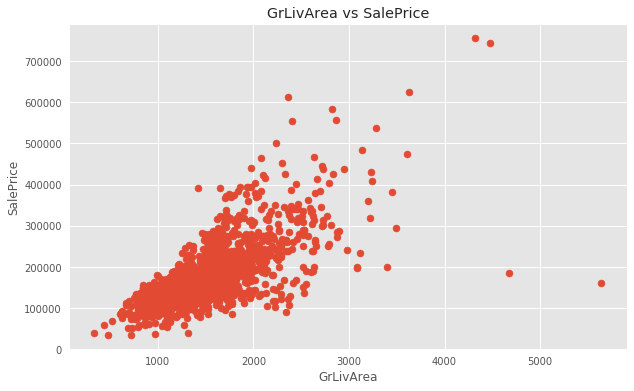

In [23]:
###############################################
# --- Scatter Plot (GrLivArea vs SalePrice) ---
###############################################

x = data_train['GrLivArea']
y = data_train['SalePrice']

plt.scatter(x,y)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title("GrLivArea vs SalePrice")
plt.show()

<p style="color: red">
	###-> The two points where GrLivArea > 4000 and are below SalePrice of 200000 are not following the path <br>
    ###-> Therefore, we'll define them as outliers and delete them.
</p>

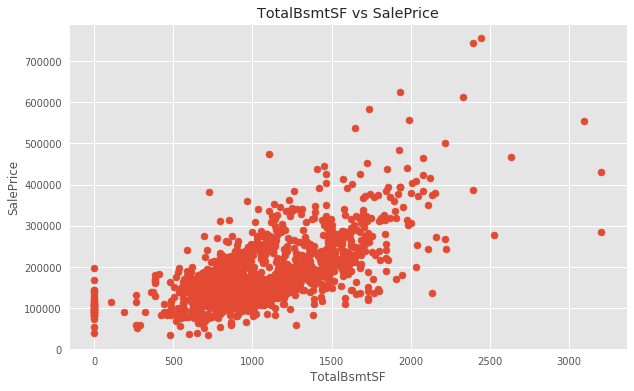

In [26]:
#################################################
# --- Scatter Plot (TotalBsmtSF vs SalePrice) ---
#################################################

x = data_train['TotalBsmtSF']
y = data_train['SalePrice']

plt.scatter(x,y)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title("TotalBsmtSF vs SalePrice")
plt.show()

<p style="color: red">
	###-> Here there are some extremely high values (>3000) of TotalBsmtSF, But its hard to exclude them for outliers as they are kind of following the trend.
</p>

In [25]:
#######################################
# --- Deleting the Points(Outliers) ---
#######################################

# data_train[(data_tarain['SalePrice'] < 200000) & (data_train['GrLivArea'] > 4000)][['GrLivArea', 'SalePrice']]
# Index 523 and 1298
# ID 524 and 1299

data_train = data_train.drop(labels=data_train[data_train['Id'] == 1299].index)
data_train = data_train.drop(labels=data_train[data_train['Id'] == 524].index)

---